#**MNIST Handwritten Digit Clasification using Deep Learning (Neural Network)**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras
from keras.datasets import mnist
from tensorflow.math import confusion_matrix

In [2]:
#Loading the MNIST data from keras.datasets

In [3]:
(X_train, Y_train), (X_test, Y_test) =  mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [4]:
type(X_train)

numpy.ndarray

In [5]:
# shape of the numpy array
print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


Training data = 60,000 Images

Test data = 10,000 Images

Image dimension  --> 28 x 28

Grayscale Image  --> 1 channel

In [6]:
# printing the 10th image

print(X_train[10])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  42 118 219 166 118 118   6
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 103 242 254 254 254 254 254  66
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  18 232 254 254 254 254 254 238
   70   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 104 244 254 224 254 254 254
  141   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 207 254 210 25

In [7]:
print(X_train[10].shape)

(28, 28)


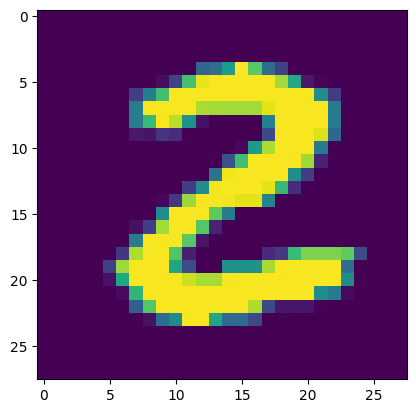

2


In [8]:
# displaying the image

plt.imshow(X_train[25])
plt.show()

# print the corresponding label
print(Y_train[25])

In [9]:
#Image Lables

In [10]:
print(Y_train.shape, Y_test.shape)

(60000,) (10000,)


In [11]:
# unique values in Y_train
print(np.unique(Y_train))

# unique values in Y_test
print(np.unique(Y_test))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


We can use these labels as such or we can also apply One Hot Encoding

**One Hot Encoding**<br>
**0** --> 1000000000<br>
**1** --> 0100000000<br>
**2** --> 0010000000<br>
.<br>
.<br>
**9** -->0000000001<br>



All the images have the same dimensions in this dataset, If not, we have to resize all the images to a common dimension


In [12]:
# scaling the values

X_train = X_train/255
X_test = X_test/255

In [13]:
# printing the 10th image

print(X_train[10])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

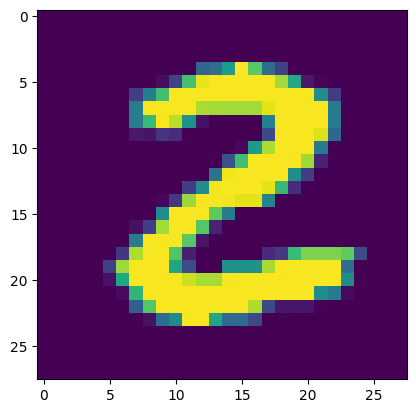

2


In [14]:
# displaying the image

plt.imshow(X_train[25])
plt.show()

# print the corresponding label
print(Y_train[25])

scaling doesn't affect on image

#**Building the Neural Network**

In [15]:
# setting up the layers of Neural Network
model = keras.Sequential([
                            keras.layers.Flatten(input_shape=(28,28)),
                            keras.layers.Dense(50, activation="relu"),
                            keras.layers.Dense(50, activation="relu"),
                            keras.layers.Dense(10,activation="sigmoid")
])

In [16]:
# compile the model
model.compile(optimizer="adam",
              loss = "sparse_categorical_crossentropy",
              metrics = ["accuracy"]
)

In [17]:
# training the Neural Network

model.fit(X_train, Y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.2960 - accuracy: 0.9143
Epoch 2/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1363 - accuracy: 0.9589
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1012 - accuracy: 0.9689
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0812 - accuracy: 0.9749
Epoch 5/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0693 - accuracy: 0.9779
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0581 - accuracy: 0.9813
Epoch 7/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0501 - accuracy: 0.9840
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0441 - accuracy: 0.9857
Epoch 9/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0382 - accuracy: 0.9875
Epoch 10/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.033

#**Training data accuracy = 98.9%**

In [18]:
# accuracy on test data
loss,accuracy = model.evaluate(X_test, Y_test)
print(accuracy)

313/313 [==============================] - 1s 2ms/step - loss: 0.1095 - accuracy: 0.9706
0.9706000089645386


#**Test data accuracy = 97.1%**

In [19]:
print(X_test.shape)

(10000, 28, 28)


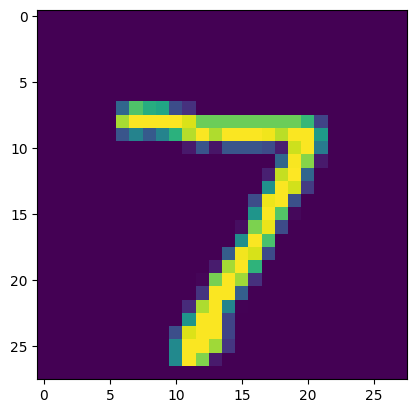

In [20]:
# first datapoint in X_test
plt.imshow(X_test[0])
plt.show()

In [21]:
print(Y_test[0])

7


In [22]:
Y_pred = model.predict(X_test)

313/313 [==============================] - 1s 2ms/step


In [23]:
print(Y_pred.shape)

(10000, 10)


In [24]:
print(Y_pred[0])

[6.6935468e-06 8.1505194e-02 7.9056442e-01 1.4226185e-01 1.7967858e-06
 6.0897791e-03 3.3275718e-13 9.9999994e-01 2.5245443e-05 9.7325882e-03]


model.predict() gives the prediction probability of each class for that data point

In [25]:
label_for_first_test_image = np.argmax(Y_pred[0])
print(label_for_first_test_image)

7


In [26]:
# converting the prediction probabilities to class label for all test data points
Y_pred_labels = [np.argmax(i) for i in Y_pred]
print(Y_pred_labels)

[7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 7, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3, 7, 4, 6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4, 1, 7, 6, 9, 6, 0, 5, 4, 5, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 9, 4, 4, 9, 2, 5, 4, 7, 6, 7, 9, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 9, 9, 9, 5, 5, 1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7, 1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 9, 0, 3, 1, 6, 4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 5, 9, 3, 9, 0, 3, 5, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 8, 7, 9, 2, 2, 4, 1, 5, 8, 8, 7, 2, 3, 0, 2, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 6, 8, 5, 7, 7, 9, 1, 8, 1, 8, 0, 3, 0, 1, 9, 9, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2, 6, 4, 1, 5, 4, 2, 9, 2, 0, 4, 0, 0, 2, 8, 4, 7, 1, 2, 4, 0, 2, 7, 4, 3, 3, 0, 0, 3, 1, 9, 6, 5, 2, 5, 9, 7, 9, 3, 0, 4, 2, 0, 7, 1, 1, 2, 1, 

Y_test  -->  True labels

Y_pred_labels  -->  Predicted Labels

#Confusion Matrix

In [27]:
conf_mat = confusion_matrix(Y_test, Y_pred_labels)

In [28]:
print(conf_mat)

tf.Tensor(
[[ 964    0    2    1    0    5    2    4    1    1]
 [   0 1124    3    2    0    2    1    1    2    0]
 [   1    4 1004    6    2    0    1    5    8    1]
 [   1    0    7  984    2    5    0    8    3    0]
 [   0    1    5    1  956    1    3    2    1   12]
 [   3    0    0   11    1  863    4    1    3    6]
 [   4    1    3    1   11    9  919    1    9    0]
 [   1    2   13    2    2    0    0 1004    2    2]
 [   2    1    4    6    6    9    1    6  933    6]
 [   2    2    1    9   13    5    0   18    4  955]], shape=(10, 10), dtype=int32)


Text(0.5, 47.7222222222222, 'Predicted Labels')

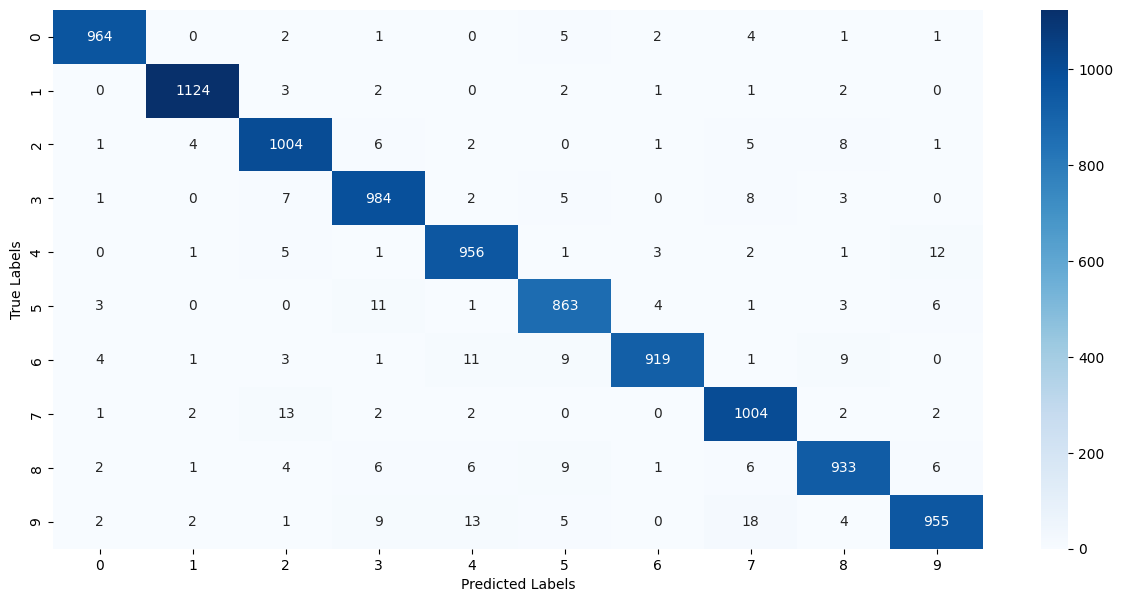

In [29]:
plt.figure(figsize=(15,7))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')

#**Building a Predictive System**

In [30]:
image_path = "/content/MNIST_digit.png"

input_image = cv2.imread(image_path)

In [31]:
type(input_image)

numpy.ndarray

In [32]:
print(input_image)

[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]


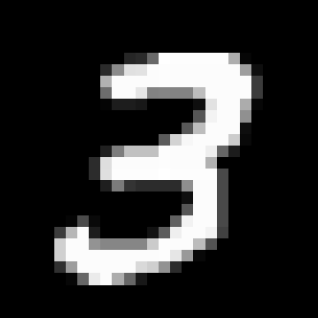

In [33]:
cv2_imshow(input_image)

In [34]:
input_image.shape

(318, 318, 3)

In [35]:
grayscale = cv2.cvtColor(input_image, cv2.COLOR_RGB2GRAY)

In [36]:
grayscale.shape

(318, 318)

In [37]:
input_image_resize = cv2.resize(grayscale, (28,28))

In [38]:
input_image_resize.shape

(28, 28)

In [39]:
cv2_imshow(input_image_resize)

In [40]:
input_image_resize = input_image_resize/225

In [41]:
type(input_image_resize)

numpy.ndarray

In [42]:
image_reshaped = np.reshape(input_image_resize, [1,28,28])

In [43]:
image_reshaped.shape

(1, 28, 28)

In [44]:
input_prediction = model.predict(image_reshaped)

1/1 [==============================] - 0s 26ms/step


In [45]:
print(input_prediction)

[[5.2941414e-12 9.5616817e-04 5.6522173e-01 1.0000000e+00 3.0408263e-11
  2.4485813e-01 1.5551212e-18 3.3371184e-02 6.9619942e-01 9.7889668e-01]]


In [46]:
input_pred_label = np.argmax(input_prediction)

In [47]:
print(input_pred_label)

3


#Predictive System

Path of the image to be predicted: /content/MNIST_digit.png


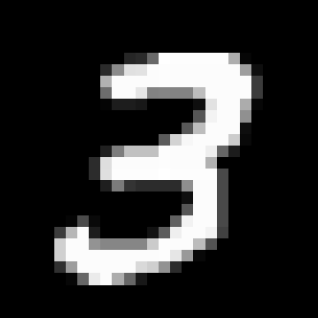

1/1 [==============================] - 0s 23ms/step
The Handwritten Digit is recognised as  3


In [56]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

grayscale = cv2.cvtColor(input_image, cv2.COLOR_RGB2GRAY)

input_image_resize = cv2.resize(grayscale, (28, 28))

input_image_resize = input_image_resize/255

image_reshaped = np.reshape(input_image_resize, [1,28,28])

input_prediction = model.predict(image_reshaped)

input_pred_label = np.argmax(input_prediction)

print('The Handwritten Digit is recognised as ', input_pred_label)